In [2]:
#Importing libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV   #Perforing grid search
import matplotlib.pylab as plt
from datetime import date 
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [3]:
### Reading the train data
train=pd.read_csv("Train.csv",encoding = "ISO-8859-1")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     87020 non-null  object 
 1   Gender                 87020 non-null  object 
 2   City                   86017 non-null  object 
 3   Monthly_Income         87020 non-null  int64  
 4   DOB                    87020 non-null  object 
 5   Lead_Creation_Date     87020 non-null  object 
 6   Loan_Amount_Applied    86949 non-null  float64
 7   Loan_Tenure_Applied    86949 non-null  float64
 8   Existing_EMI           86949 non-null  float64
 9   Employer_Name          86949 non-null  object 
 10  Salary_Account         75256 non-null  object 
 11  Mobile_Verified        87020 non-null  object 
 12  Var5                   87020 non-null  int64  
 13  Var1                   87020 non-null  object 
 14  Loan_Amount_Submitted  52407 non-null  float64
 15  Lo

In [5]:
train.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,7-Oct-85,4-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,9-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [3]:
### Performing EDA
train = train.drop(columns = ['City', 'Employer_Name', 'Lead_Creation_Date', 'LoggedIn', 'Salary_Account'])

In [6]:
train['EMI_Loan_Submitted_Missing'] = np.where(train['EMI_Loan_Submitted'].isna(), 1, 0)
train['Loan_Amount_Submitted_Missing'] = np.where(train['Loan_Amount_Submitted'].isna(), 1, 0)
train['Loan_Tenure_Submitted_Missing'] = np.where(train['Loan_Tenure_Submitted'].isna(), 1, 0)
train['Processing_Fee_Missing'] = np.where(train['Processing_Fee'].isna(), 1, 0)
train['Interest_Rate_Missing'] = np.where(train['Interest_Rate'].isna(), 1, 0)
train = train.drop(['EMI_Loan_Submitted', 'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 
                    'Interest_Rate', 'Processing_Fee'], axis=1)
train.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Var2,Source,Var4,LoggedIn,Disbursed,EMI_Loan_Submitted_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,Processing_Fee_Missing,Interest_Rate_Missing
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,G,S122,1,0,0,1,1,1,1,1
1,ID000004E40,Male,Mumbai,35000,7-Oct-85,4-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,G,S122,3,0,0,0,0,0,1,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,B,S143,1,0,0,1,0,0,1,1
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,9-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,B,S143,3,0,0,1,0,0,1,1
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,B,S134,3,1,0,1,0,0,1,1


In [5]:
from datetime import datetime, date

def age(born):
    born = datetime.strptime(born, "%d-%b-%y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

train['Age'] = train['DOB'].apply(age)
train = train.drop('DOB', axis=1)

In [6]:
train['Existing_EMI'].fillna(0, inplace=True)
train['Loan_Amount_Applied'].fillna(train['Loan_Amount_Applied'].median(), inplace = True)
train['Loan_Tenure_Applied'].fillna(train['Loan_Tenure_Applied'].median(), inplace = True)

In [7]:
source = train.Source.unique().tolist()
source.remove("S122")
source.remove("S133")
train.Source = train.Source.replace(source, "Other")
train.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Var2,Source,Var4,LoggedIn,Disbursed,EMI_Loan_Submitted_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing,Processing_Fee_Missing,Interest_Rate_Missing
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,G,S122,1,0,0,1,1,1,1,1
1,ID000004E40,Male,Mumbai,35000,7-Oct-85,4-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,G,S122,3,0,0,0,0,0,1,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,B,Other,1,0,0,1,0,0,1,1
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,9-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,B,Other,3,0,0,1,0,0,1,1
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,B,Other,3,1,0,1,0,0,1,1


In [8]:
train = pd.get_dummies(train, columns=['Gender', 'Mobile_Verified', 'Filled_Form', 'Device_Type', 'Source'])

In [9]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
train["Var1"] = ord_enc.fit_transform(train[["Var1"]])
train["Var2"] = ord_enc.fit_transform(train[["Var2"]])
train.head()

,ID,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Var5,Var1,Var2,Var4,Disbursed,...,Gender_Male,Mobile_Verified_N,Mobile_Verified_Y,Filled_Form_N,Filled_Form_Y,Device_Type_Mobile,Device_Type_Web-browser,Source_Other,Source_S122,Source_S133
0,ID000002C20,20000,300000.0,5.0,0.0,0,13.0,6.0,1,0,...,0,1,0,1,0,0,1,0,1,0
1,ID000004E40,35000,200000.0,2.0,0.0,13,8.0,6.0,3,0,...,1,0,1,1,0,0,1,0,1,0
2,ID000007H20,22500,600000.0,4.0,0.0,0,13.0,1.0,1,0,...,1,0,1,1,0,0,1,1,0,0
3,ID000008I30,35000,1000000.0,5.0,0.0,10,13.0,1.0,3,0,...,1,0,1,1,0,0,1,1,0,0
4,ID000009J40,100000,500000.0,2.0,25000.0,17,13.0,1.0,3,0,...,1,0,1,1,0,0,1,1,0,0


### Creating a base gbm model

In [10]:
#### Creating datatset with dependent and independent varaibles
Dependent=train["Disbursed"]
IndependentCols=train.columns.values[np.invert (pd.Series(train.columns.values).isin(["Disbursed","ID"]))]
Independent=train[IndependentCols]

## fitting a base gbm model
gbm0 = GradientBoostingClassifier(random_state=10) ## initialising base gbm model
gbm0.fit(Independent, Dependent)

GradientBoostingClassifier(random_state=10)

In [11]:
accuracy = gbm0.score(Independent, Dependent)
print(f"Accuracy = {accuracy}")

Accuracy = 0.9855780280395311


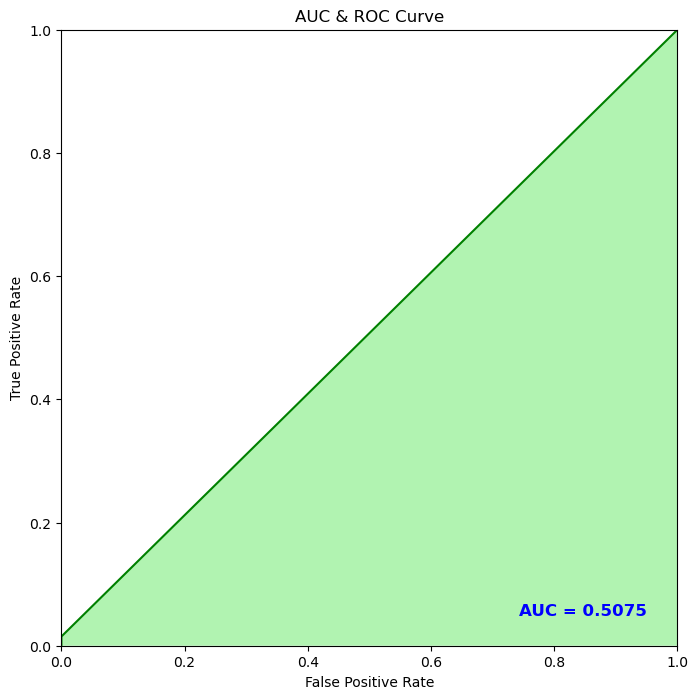

In [13]:
Pred = gbm0.predict(Independent)
auc = metrics.roc_auc_score(Dependent, Pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(Dependent, Pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [14]:
CV = cross_validate(gbm0, Independent, Dependent, cv = 5)
print(CV)

{'fit_time': array([6.51572108, 7.25501037, 6.34143162, 7.13559103, 6.412323  ]), 'score_time': array([0.02600026, 0.02500248, 0.02402711, 0.02099609, 0.02400017]), 'test_score': array([0.98506091, 0.98529074, 0.9853482 , 0.98517582, 0.98517582])}


In [19]:
print(f"Min = {CV['test_score'].min()}")
print(f"Max = {CV['test_score'].max()}")
print(f"Mean = {CV['test_score'].mean()}")
print(f"Std Dev = {np.std(CV['test_score'])}")

Min = 0.9850609055389565
Max = 0.9853481958170536
Mean = 0.985210296483567
Std Dev = 0.00010018154317493585


In [24]:
### Creating Models by  tuning n_estimators  by varying from its values from 20 to 80 in steps of 10
param_test1 = {'n_estimators':np.arange(20,81,10)}
gsearch1 = GridSearchCV(estimator = 
                        GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,
                                                   max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(Independent,Dependent)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 3.06741099,  5.17725687,  5.47888269,  8.57964315, 11.48271561,
         11.0802989 , 12.28819299]),
  'std_fit_time': array([0.19783888, 0.1515111 , 0.33916577, 1.36860241, 0.31706098,
         0.43569956, 1.06010287]),
  'mean_score_time': array([0.07719798, 0.09917445, 0.09620047, 0.17632585, 0.16628084,
         0.1764154 , 0.15827532]),
  'std_score_time': array([0.00288603, 0.00911353, 0.01175337, 0.05687423, 0.03051425,
         0.02703963, 0.04125782]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators': 80}],
  'split0_test_score': array([0.82188862, 0.82323902, 0.82271344, 0.82375026, 0.82379904,
         0.82302599, 0.82190021]),

In [26]:
gsearch1.best_params_['n_estimators']

50

In [28]:
### Tuning hyperparameters
param_test2 = {'min_samples_split':np.arange(1000,2100,200), 'max_depth':np.arange(5, 16, 2)}
gsearch2 = GridSearchCV(estimator = 
                        GradientBoostingClassifier(learning_rate=0.1, n_estimators=gsearch1.best_params_['n_estimators'], 
                                                   min_samples_leaf=50, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(Independent,Dependent)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([ 5.04786878,  5.3841814 ,  5.40837049,  5.40398588,  4.83883376,
          5.38540554,  6.70546012,  6.67073531,  5.48227391,  6.5247427 ,
          6.51345501,  6.57527056,  6.95502653,  7.62246628,  8.2658195 ,
          8.04895864,  9.65502238,  9.30433984, 10.34790597,  9.07652431,
          8.45819769,  8.77347217,  7.57833128,  8.26363435,  9.25680027,
          9.1778162 ,  8.39602871,  8.95673733,  8.07443523,  7.94589581,
          9.43099546,  9.22437325,  8.53692851,  8.90407991,  8.23054037,
          7.71918058]),
  'std_fit_time': array([0.4759179 , 0.56770329, 0.52816317, 0.23991468, 0.41359538,
         0.18089584, 0.11878342, 0.21285085, 0.43469655, 0.22465968,
         0.25371111, 0.20958334, 0.59638002, 0.57233942, 1.27207329,
         0.81850824, 0.14001921, 0.13123433, 0.3896993 , 0.95050941,
         0.18763492, 0.20872789, 0.63202772, 0.52411421, 0.23178771,
         0.46843107, 0.68658352, 0.86755693, 0.23325564, 0.47827792,
         0.

In [29]:
## Tuning the Model with best max depth from above and varying 
## (i)min_samples_split':range(1000,2100,200), 
## (i)'min_samples_leaf':range(30,71,10)

param_test3 = {'min_samples_split':np.arange(1000,2100,200), 'min_samples_leaf':np.arange(30,71,10)}
gsearch3 = GridSearchCV(estimator = 
                        GradientBoostingClassifier(learning_rate=0.1, n_estimators=gsearch1.best_params_['n_estimators'], 
                                                   max_depth=gsearch2.best_params_['max_depth'],max_features='sqrt', 
                                                   subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(Independent,Dependent)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([ 7.5442719 , 10.04591198,  8.90980654,  8.65630355,  8.73287086,
          8.58179421,  9.59921503,  9.15837069, 11.13700328,  9.97563453,
          9.42750025,  8.07879872,  9.39151111, 11.0956337 ,  9.61284676,
          8.86838236,  8.27585115,  8.34953938,  9.0236342 ,  8.45988684,
          8.72451415,  7.9564817 ,  7.66936855,  8.45469928,  7.96287537,
          8.14338036,  8.07977161,  8.83100443,  8.57549639,  6.72186627]),
  'std_fit_time': array([1.80942806, 0.84072635, 0.1049814 , 0.14650643, 0.27226769,
         0.44686207, 0.67290411, 0.49181537, 0.31403829, 0.67358469,
         0.58828099, 0.87194637, 0.57470205, 0.79790749, 1.34523616,
         0.27013314, 0.42038285, 0.6082768 , 0.60708567, 0.37789445,
         0.57344753, 0.69875767, 0.68588463, 0.6592609 , 0.42867958,
         0.38995482, 0.28957904, 0.44865435, 0.14580061, 1.45998722]),
  'mean_score_time': array([0.17230968, 0.14179258, 0.14423232, 0.15579982, 0.1471354 ,
         0.136094

In [36]:
param_test4 = {'max_features':np.arange(7,20,2)}
gsearch4 = GridSearchCV(estimator = 
                        GradientBoostingClassifier(learning_rate=0.1, n_estimators= gsearch1.best_params_['n_estimators'], 
                                                   max_depth= gsearch2.best_params_['max_depth'], 
                                                   min_samples_split = gsearch3.best_params_['min_samples_split'],
                                                   min_samples_leaf = gsearch3.best_params_['min_samples_leaf'],
                                                   subsample=0.8, random_state=10), 
param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(Independent,Dependent)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([11.38063021, 14.39654665, 16.55629215, 18.60349274, 21.66537185,
         23.23849111, 24.85616264]),
  'std_fit_time': array([0.65146187, 0.5212482 , 0.31795757, 0.29711206, 0.67389334,
         1.06273202, 1.26212907]),
  'mean_score_time': array([0.15291028, 0.14706054, 0.14521413, 0.12026482, 0.15318084,
         0.14751678, 0.11099591]),
  'std_score_time': array([0.0205326 , 0.01213153, 0.00594845, 0.03122394, 0.01963862,
         0.02065107, 0.0191492 ]),
  'param_max_features': masked_array(data=[7, 9, 11, 13, 15, 17, 19],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 7},
   {'max_features': 9},
   {'max_features': 11},
   {'max_features': 13},
   {'max_features': 15},
   {'max_features': 17},
   {'max_features': 19}],
  'split0_test_score': array([0.82259349, 0.8279127 , 0.82631551, 0.8231216 , 0.82307523,
         0.82659041, 0.82314502]),
  '

In [37]:
param_test5 = {'subsample':(0.6,0.7,0.75,0.8,0.85,0.9)}
gsearch5 = GridSearchCV(estimator = 
                        GradientBoostingClassifier(learning_rate=0.1, n_estimators = gsearch1.best_params_['n_estimators'], 
                                                   max_depth = gsearch2.best_params_['max_depth'], 
                                                   max_features = gsearch4.best_params_['max_features'],
                                                   min_samples_split = gsearch3.best_params_['min_samples_split'],
                                                   min_samples_leaf = gsearch3.best_params_['min_samples_leaf'],
                                                   subsample=0.8, random_state=10), 
param_grid = param_test5, scoring='roc_auc',n_jobs=4, cv=5)
gsearch5.fit(Independent,Dependent)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([10.66008329, 12.20647421, 12.46229725, 16.40265408, 19.22858229,
         18.64512887]),
  'std_fit_time': array([0.53055303, 0.7855909 , 0.68750585, 1.6841565 , 0.38242468,
         1.6519932 ]),
  'mean_score_time': array([0.18427105, 0.12732377, 0.14601436, 0.16768513, 0.23432698,
         0.19501309]),
  'std_score_time': array([0.00882706, 0.01591128, 0.03838521, 0.02598676, 0.02797392,
         0.07855883]),
  'param_subsample': masked_array(data=[0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.6},
   {'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9}],
  'split0_test_score': array([0.82346399, 0.82247102, 0.82147494, 0.8279127 , 0.82220208,
         0.82323971]),
  'split1_test_score': array([0.82595716, 0.82467769, 0.82349143, 0.83265949, 0.8297189 ,
         0.

In [41]:
gbm_tuned1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators = gsearch1.best_params_['n_estimators'], 
                                        max_depth = gsearch2.best_params_['max_depth'], 
                                        max_features = gsearch4.best_params_['max_features'],
                                        min_samples_split = gsearch3.best_params_['min_samples_split'],
                                        min_samples_leaf = gsearch3.best_params_['min_samples_leaf'],
                                        subsample=0.8, random_state=10)
gbm_tuned1.fit(Independent,Dependent)
Pred1 = gbm_tuned1.predict(Independent)
auc1 = metrics.roc_auc_score(Dependent, Pred1)
print(auc1)

0.5


In [42]:
gbm_tuned2 = GradientBoostingClassifier(learning_rate=0.02, n_estimators = gsearch1.best_params_['n_estimators'], 
                                        max_depth = gsearch2.best_params_['max_depth'], 
                                        max_features = gsearch4.best_params_['max_features'],
                                        min_samples_split = gsearch3.best_params_['min_samples_split'],
                                        min_samples_leaf = gsearch3.best_params_['min_samples_leaf'],
                                        subsample=0.8, random_state=10)
gbm_tuned2.fit(Independent,Dependent)
Pred2 = gbm_tuned2.predict(Independent)
auc2 = metrics.roc_auc_score(Dependent, Pred2)
print(auc2)

0.5


In [43]:
gbm_tuned3 = GradientBoostingClassifier(learning_rate=0.005, n_estimators = gsearch1.best_params_['n_estimators'], 
                                        max_depth = gsearch2.best_params_['max_depth'], 
                                        max_features = gsearch4.best_params_['max_features'],
                                        min_samples_split = gsearch3.best_params_['min_samples_split'],
                                        min_samples_leaf = gsearch3.best_params_['min_samples_leaf'],
                                        subsample=0.8, random_state=10)
gbm_tuned3.fit(Independent,Dependent)
Pred3 = gbm_tuned3.predict(Independent)
auc3 = metrics.roc_auc_score(Dependent, Pred3)
print(auc3)

0.5


In [45]:
### All similar auc so taking gbm_tuned1
gbm_tuned1.score(Independent, Dependent)

0.9853711790393013